## Yearly water demand in the Greater Stuttgart area

In [4]:
from utils.yearly_data_prep import create_yearly_df
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = create_yearly_df()

In [ ]:
## Solve for one NA value in the 'Wert' column using linear interpolation
# Identify the index of the NaN value in the 'Wert' column
nan_index = df["Wert"].isna()

# Replace NaN with the mean of the previous and next year's values
df.loc[nan_index, "Wert"] = (df["Wert"].shift(1) + df["Wert"].shift(-1)) / 2

In [13]:
# Prepare the data
X = df[["Summe_Einwohner", "Wert"]]
y = df["Wasserbereitstellung_Summe"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Wasserbereitstellung_Summe   R-squared:                       0.799
Model:                                    OLS   Adj. R-squared:                  0.791
Method:                         Least Squares   F-statistic:                     89.68
Date:                        Tue, 28 Jan 2025   Prob (F-statistic):           2.00e-16
Time:                                22:25:39   Log-Likelihood:                -125.21
No. Observations:                          48   AIC:                             256.4
Df Residuals:                              45   BIC:                             262.0
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

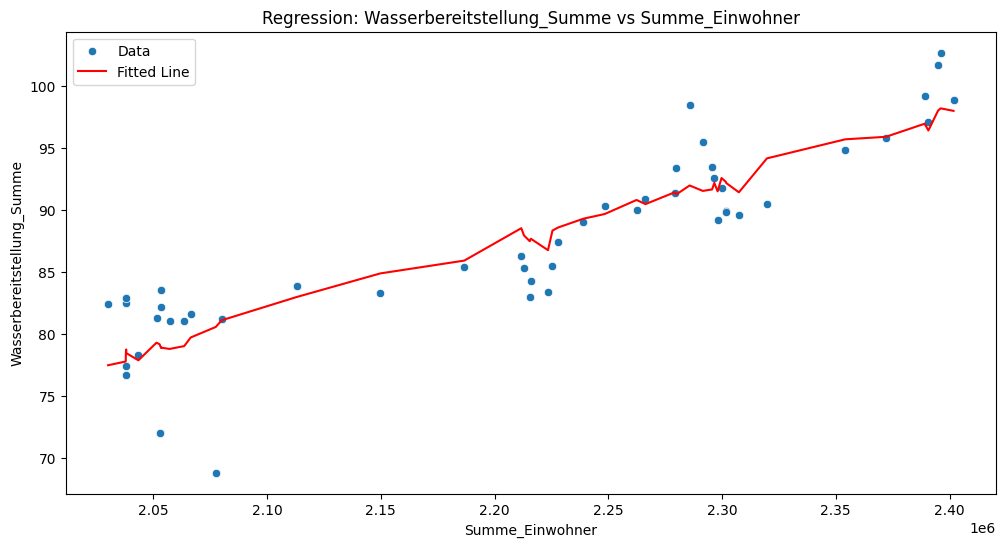

In [ ]:
# Visualize the regression results
# Plot Wasserbereitstellung_Summe vs Summe_Einwohner
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Summe_Einwohner", y="Wasserbereitstellung_Summe", data=df, label="Data"
)
sns.lineplot(
    x="Summe_Einwohner", y=model.predict(X), color="red", data=df, label="Fitted Line"
)
plt.xlabel("Summe_Einwohner")
plt.ylabel("Wasserbereitstellung_Summe")
plt.title("Regression: Wasserbereitstellung_Summe vs Summe_Einwohner")
plt.legend()
plt.show()

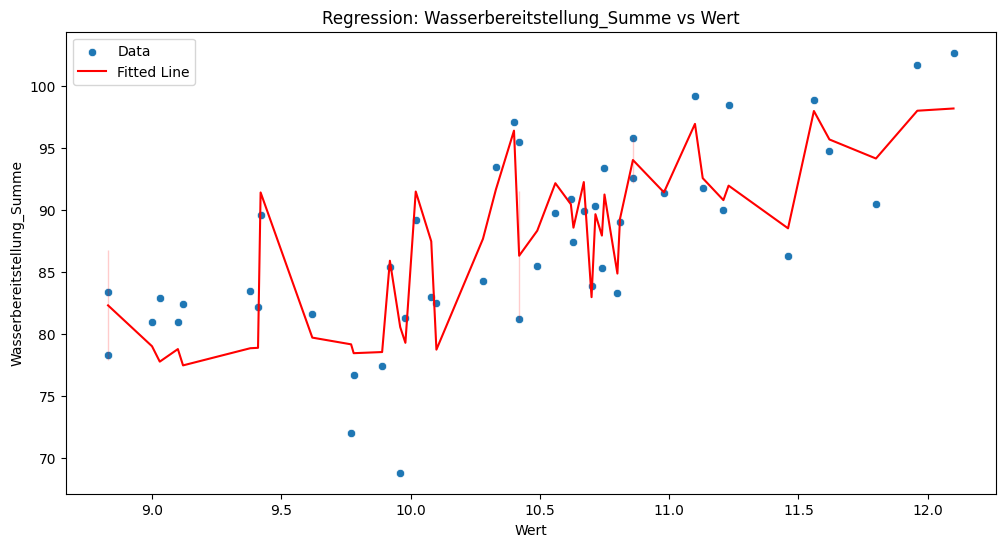

In [16]:
# Plot Wasserbereitstellung_Summe vs Wert
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Wert", y="Wasserbereitstellung_Summe", data=df, label="Data")
sns.lineplot(x="Wert", y=model.predict(X), color="red", data=df, label="Fitted Line")
plt.xlabel("Wert")
plt.ylabel("Wasserbereitstellung_Summe")
plt.title("Regression: Wasserbereitstellung_Summe vs Wert")
plt.legend()
plt.show()